# Preficicação Dinâmica

### Importações

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Dados

In [2]:
df = pd.read_csv("precificacao_dinamica.csv")
df.head()

,date,demand,competitor_price,season,event,price
0,2023-01-01,152,103.252217,Média,0,71.771271
1,2023-01-02,142,114.525541,Média,0,75.886497
2,2023-01-03,64,115.214399,Baixa,0,30.456867
3,2023-01-04,156,89.467408,Alta,1,87.009395
4,2023-01-05,121,116.307748,Alta,0,75.060655


Pré-Processamento

In [3]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df = pd.get_dummies(df, columns=['event', 'season'], drop_first=True)
df.head()

,date,demand,competitor_price,price,day_of_week,month,event_1,season_Baixa,season_Média
0,2023-01-01,152,103.252217,71.771271,6,1,False,False,True
1,2023-01-02,142,114.525541,75.886497,0,1,False,False,True
2,2023-01-03,64,115.214399,30.456867,1,1,False,True,False
3,2023-01-04,156,89.467408,87.009395,2,1,True,False,False
4,2023-01-05,121,116.307748,75.060655,3,1,False,False,False


### Correlograma

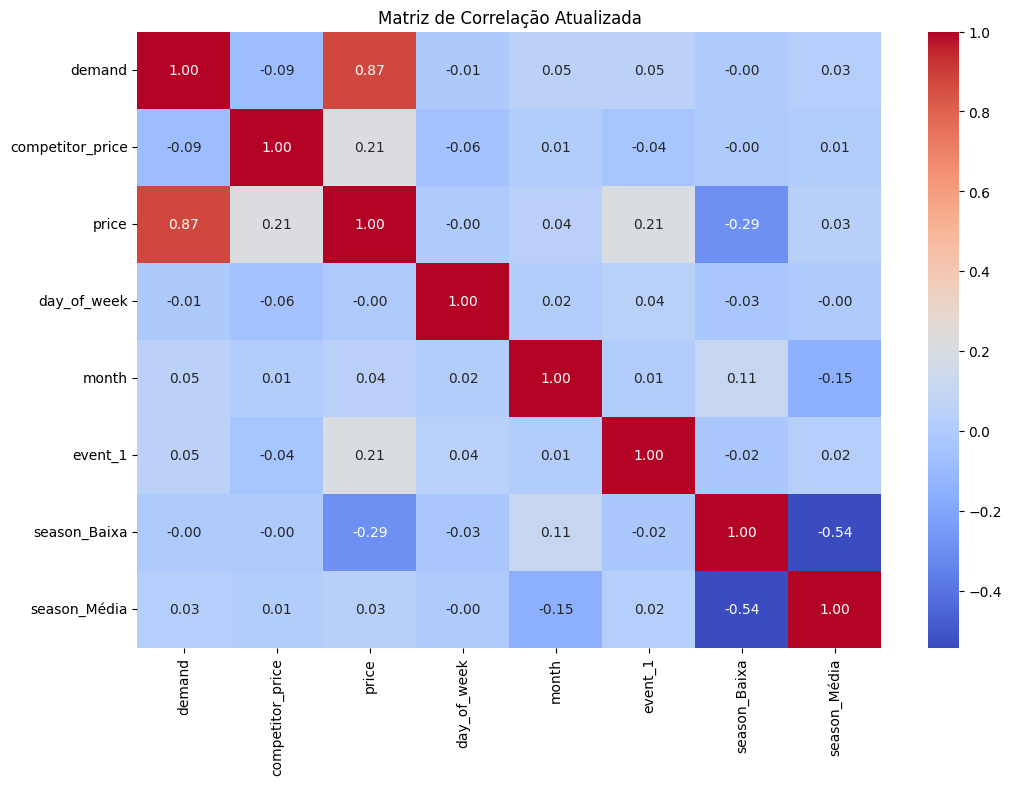

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns='date').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação Atualizada")
plt.show()

### Pré-Processamento

In [5]:
X = df[['demand', 'competitor_price', 'event_1', 'season_Baixa']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Treino

In [6]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Avaliação

In [7]:
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAPE: {mape:.2f}%")

MSE: 17.06
R²: 0.96
MAPE: 6.23%


### Visualização do Modelo

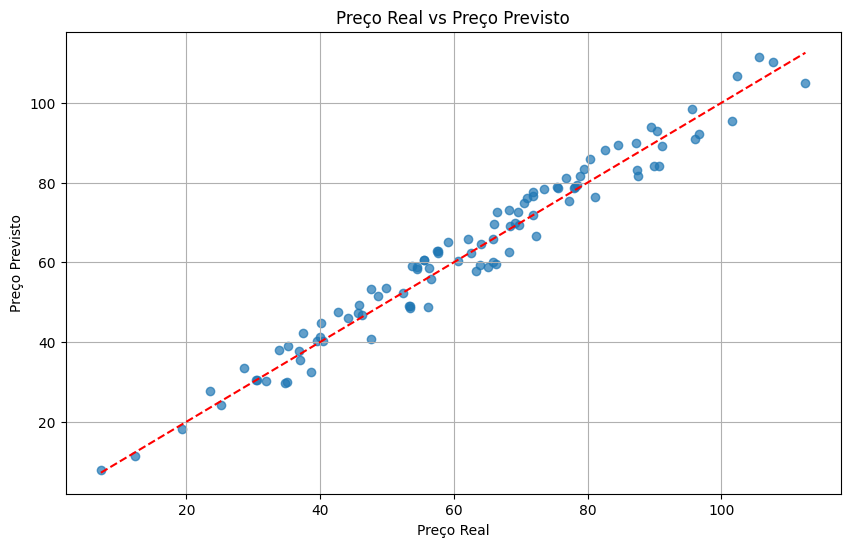

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Preço Real vs Preço Previsto')
plt.grid(True)
plt.show()

### Prever Novos Preços

In [10]:
demand = 200
competitor_price = 250
event_1 = 0
season_Baixa = 0

entrada_usuario = pd.DataFrame({
    'demand': [demand],
    'competitor_price': [competitor_price],
    'event_1': [int(event_1)],
    'season_Baixa': [season_Baixa]
})

previsao_preco = modelo.predict(entrada_usuario)


print(f"Preço previsto com base nas entradas informadas: R$ {previsao_preco[0]:.2f}")

Preço previsto com base nas entradas informadas: R$ 186.52
